# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [224]:
df = pd.read_csv("../data/states_edu.csv")
df.sample(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
99,1993_WEST_VIRGINIA,WEST_VIRGINIA,1993,317719.0,1832154.0,140913.0,1220263.0,470978.0,1829848.0,1023497.0,...,22349.0,25677.0,21507.0,NaN,NaN,314383.0,NaN,NaN,NaN,NaN
1690,2019_NATIONAL,NATIONAL,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,241.0,282.0,220.0,263.0
1577,1987_TEXAS,TEXAS,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247433.0,234498.0,182734.0,NaN,NaN,3236787.0,NaN,NaN,NaN,NaN
494,2001_OHIO,OHIO,2001,1821546.0,16693845.0,956899.0,7088781.0,8648165.0,16282257.0,8001840.0,...,140849.0,141218.0,117683.0,1129123.0,544353.0,1830985.0,NaN,NaN,NaN,NaN
172,1995_MAINE,MAINE,1995,212154.0,1446745.0,78233.0,652626.0,715886.0,1438795.0,833366.0,...,17419.0,16771.0,12670.0,NaN,NaN,213569.0,NaN,NaN,NaN,NaN
646,2004_NORTH_DAKOTA,NORTH_DAKOTA,2004,101889.0,925393.0,134759.0,336722.0,453912.0,957480.0,481403.0,...,7069.0,8127.0,8143.0,59390.0,33391.0,100513.0,NaN,NaN,NaN,NaN
745,2006_NEW_MEXICO,NEW_MEXICO,2006,326761.0,3094036.0,446994.0,2197044.0,449998.0,3099738.0,1500318.0,...,24311.0,25563.0,19329.0,198571.0,98129.0,328220.0,NaN,NaN,NaN,NaN
86,1993_OHIO,OHIO,1993,1834239.0,10841606.0,509488.0,4156070.0,6176048.0,10385253.0,5522474.0,...,136317.0,141534.0,111932.0,NaN,NaN,1807319.0,NaN,NaN,NaN,NaN
80,1993_NEW_HAMPSHIRE,NEW_HAMPSHIRE,1993,177722.0,1109743.0,34680.0,84342.0,990721.0,1091814.0,611158.0,...,15630.0,14118.0,10635.0,NaN,NaN,185360.0,NaN,NaN,NaN,NaN
750,2006_OKLAHOMA,OKLAHOMA,2006,634468.0,5120286.0,654807.0,2570987.0,1894492.0,5094695.0,2437935.0,...,45369.0,46050.0,38453.0,373381.0,178292.0,639391.0,NaN,NaN,NaN,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [225]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL_NCES',
    'ENROLL':'ENROLL_ALL_USCB'
    },
    axis=1,inplace=True)
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df["ENROLL_ALL_USCB"] = df["ENROLL_ALL_USCB"].fillna(df["ENROLL_ALL_NCES"])
df.isna().sum()

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL_ALL_USCB                  74
TOTAL_REVENUE                   163
FEDERAL_REVENUE                 163
STATE_REVENUE                   163
LOCAL_REVENUE                   163
TOTAL_EXPENDITURE               163
INSTRUCTION_EXPENDITURE         163
SUPPORT_SERVICES_EXPENDITURE    163
OTHER_EXPENDITURE               205
CAPITAL_OUTLAY_EXPENDITURE      163
ENROLL_PREK                      84
ENROLL_KINDER                    74
ENROLL_4                         74
ENROLL_8                         74
ENROLL_12                        74
ENROLL_PRIMARY                  205
ENROLL_HS                       154
ENROLL_ALL_NCES                  74
AVG_MATH_4_SCORE                 38
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE              81
AVG_READING_8_SCORE             124
dtype: int64

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [226]:
pd.read_csv("../data/states_edu.csv")["YEAR"].nunique()
# there are 33 years of data in the dataset, but only 9 end up being useful after we remove entries without math 8 scores or expenditure information

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [227]:
mich_med_score = df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].median()
ohio_med_score = df[df["STATE"] == "OHIO"]["AVG_MATH_8_SCORE"].median()

if (mich_med_score > ohio_med_score) : print("MICHIGAN")
else : print("OHIO")

OHIO


Find the average for your chosen test across all states in 2019

281.2641509433962

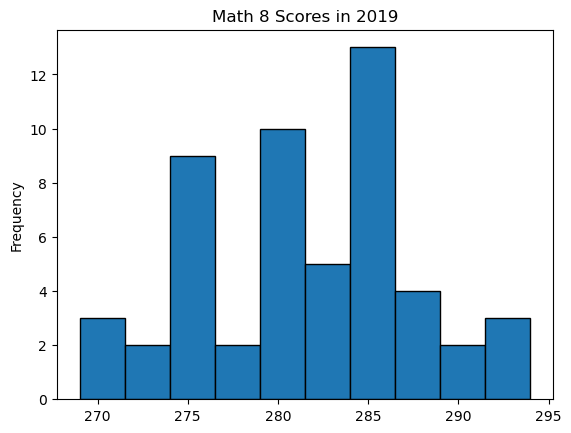

In [228]:
math_8_2019 = df[df["YEAR"] == 2019]["AVG_MATH_8_SCORE"]
math_8_2019.plot.hist(title = "Math 8 Scores in 2019", edgecolor = "black")
math_8_2019.mean()

For each state, find a maximum value for your chosen test score

In [229]:
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [230]:
df.dropna(subset=['INSTRUCTION_EXPENDITURE'], inplace=True) # Because we need complete financial information
df["EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["ENROLL_ALL_NCES"]
df["PROP_EDU_EXPENDITURE"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_REVENUE"]
df.isna().sum()

PRIMARY_KEY                      0
STATE                            0
YEAR                             0
ENROLL_ALL_USCB                  0
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               42
CAPITAL_OUTLAY_EXPENDITURE       0
ENROLL_PREK                      4
ENROLL_KINDER                    0
ENROLL_4                         0
ENROLL_8                         0
ENROLL_12                        0
ENROLL_PRIMARY                  42
ENROLL_HS                       42
ENROLL_ALL_NCES                  0
AVG_MATH_4_SCORE                 0
AVG_MATH_8_SCORE                 0
AVG_READING_4_SCORE             40
AVG_READING_8_SCORE             82
EXPENDITURE_PER_STUDENT          0
PROP_EDU_EXPENDITURE             0
dtype: int64

Feature engineering justification: 

Given information about total enrollment, revenue, expenditure, and educational performance, there are many possible predictors of a student's success. I am curious about the impact of the educational spending on that state's performance. This can be estimated by that state's total educational expenditure, adjusted for the number of students that system must account for (EXPENDITURE_PER_STUDENT). 

Also, it would be interesting to examine the relationship between the priority of education in a state and its impact on educational performance. This can be estimated by the proportion of a state's revenue is spent on education (PROP_EDU_EXPENDITURE). This metric would be improved if we had access to each state's net spending, but this is approximated with each state's revenue. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Scores')

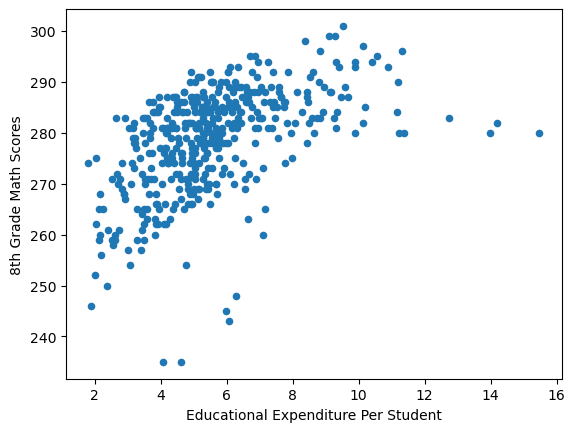

In [231]:
df.plot.scatter(x = "EXPENDITURE_PER_STUDENT", y = "AVG_MATH_8_SCORE")
plt.xlabel("Educational Expenditure Per Student")
plt.ylabel("8th Grade Math Scores")

There is a weak correlation between how much a state spends on the education of each student and those students' 8th grade math scores. There are outliers where significant spending occurs alongside poor math performance, but most cases show that increased spending improves scores. 

**Visualization 2**

Text(0, 0.5, '8th Grade Math Scores')

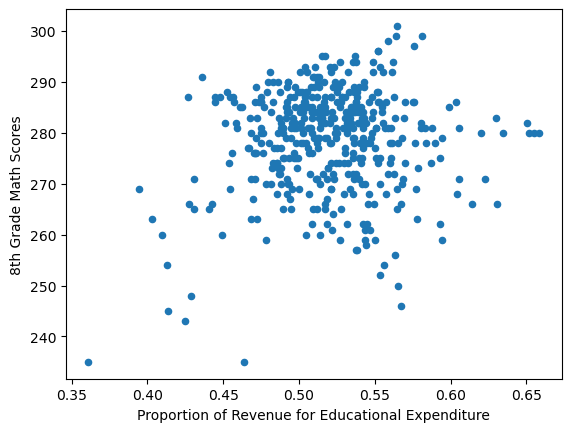

In [232]:
df.plot.scatter(x = "PROP_EDU_EXPENDITURE", y = "AVG_MATH_8_SCORE")
plt.xlabel("Proportion of Revenue for Educational Expenditure")
plt.ylabel("8th Grade Math Scores")

This graph shows that there is no relationship between educational expenditure per student and 8th grade math scores. While most entries are grouped near ~55% educational spending and a score of ~280, there is no indication that increased proportion of spending leads to higher scores. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X = df[['PROP_EDU_EXPENDITURE','EXPENDITURE_PER_STUDENT','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [235]:
# import your sklearn class here

from sklearn.linear_model import LinearRegression

In [236]:
# create your model here
model = LinearRegression()

In [237]:
model.fit(X_train, y_train)

LinearRegression()

In [238]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [239]:
print("r^2 score: ", model.score(X_test, y_test))
print("mean error: ", np.mean(model.predict(X_test)-y_test))
print("mean abs error: ", np.mean(np.abs(model.predict(X_test)-y_test)))
print("mean abs % error: ", np.mean(np.abs(model.predict(X_test)-y_test) / y_test) * 100)
print("root mean squared error: ", np.mean((model.predict(X_test)-y_test)**2)**0.5)

r^2 score:  0.758463146290226
mean error:  0.5227276644518127
mean abs error:  4.348548019573916
mean abs % error:  1.5856838952066843
root mean squared error:  5.516371632013043


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

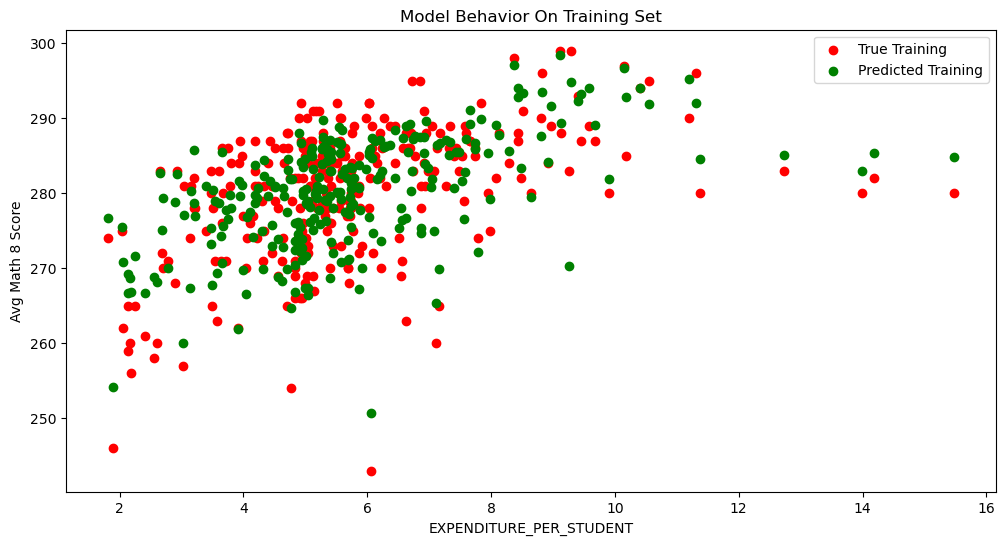

In [240]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Avg Math 8 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

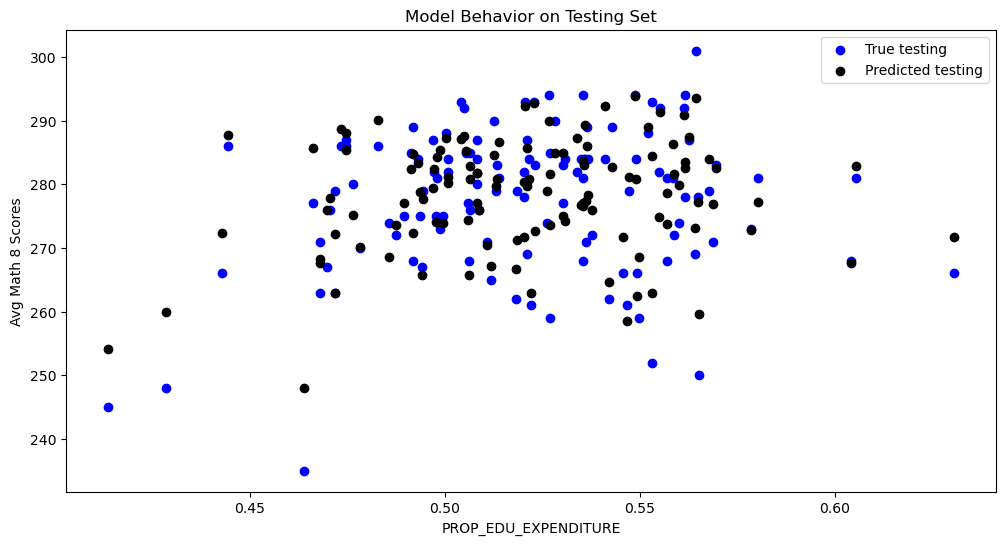

In [241]:
col_name = "PROP_EDU_EXPENDITURE"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Avg Math 8 Scores')
plt.title("Model Behavior on Testing Set")